In [1]:
import numpy as np
from sklearn.metrics import pairwise_distances
from sklearn_extra.cluster import KMedoids
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.preprocessing import RobustScaler, MinMaxScaler
import pandas as pd
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
data = pd.read_csv("../../Data/clustering/Data Clustering.csv")
df = data.copy()

df.head()

,Masking,Total,Rentang Greentick Ke Juni 2023,Rata-rata
0,Customer 0,134921,12,11244
1,Customer 1,20672,3,6891
2,Customer 2,17148,4,4287
3,Customer 3,381243,4,95311
4,Customer 4,10,0,10


Text(0, 0.5, 'Density')

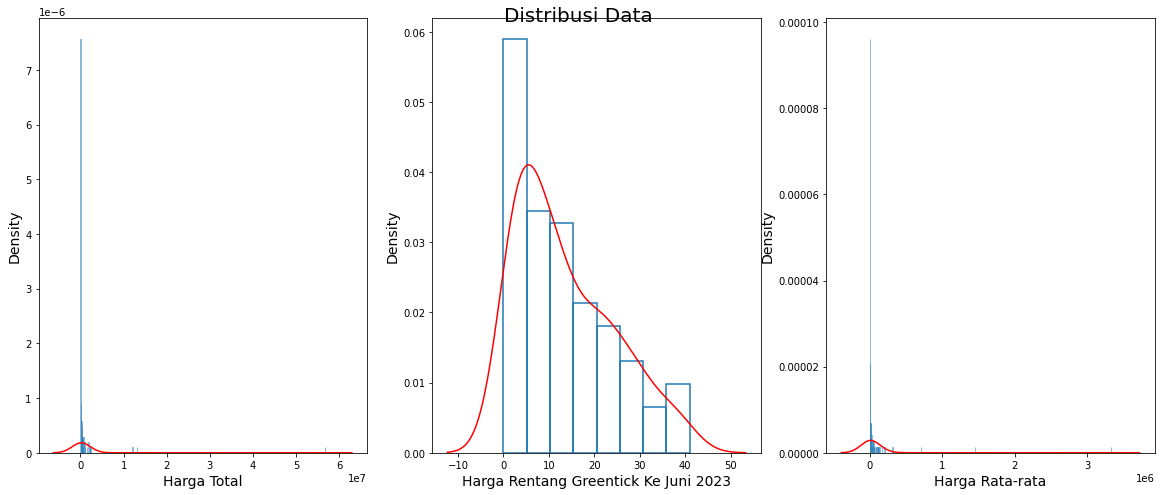

In [3]:
# make plot to see the distribution of the data
fig, ax = plt.subplots(1, 3, figsize=(20, 8))
fig.suptitle("Distribusi Data", fontsize=20, y=0.9)
sns.histplot(df["Total"], ax=ax[0], fill=False, stat="density").set_xlabel('Harga Total', fontsize=14)
sns.kdeplot(df["Total"], ax=ax[0], color="red").set_ylabel('Density', fontsize=14)

sns.histplot(df["Rentang Greentick Ke Juni 2023"], ax=ax[1], fill=False, stat="density").set_xlabel('Harga Rentang Greentick Ke Juni 2023', fontsize=14)
sns.kdeplot(df["Rentang Greentick Ke Juni 2023"], color="red", ax=ax[1]).set_ylabel('Density', fontsize=14)

sns.histplot(df["Rata-rata"], ax=ax[2], fill=False, stat="density").set_xlabel('Harga Rata-rata', fontsize=14)
sns.kdeplot(df["Rata-rata"], color="red", ax=ax[2]).set_ylabel('Density', fontsize=14)

In [4]:
hasil = pd.DataFrame(columns=['Algoritma', 'Silhoutte Score', 'CH Index Score'])

In [5]:
fitur = ['Total', 'Rentang Greentick Ke Juni 2023', 'Rata-rata']

X = df[fitur]
# scaller = MinMaxScaler()
# X = scaller.fit_transform(X)
# X = pd.DataFrame(X, columns=fitur)

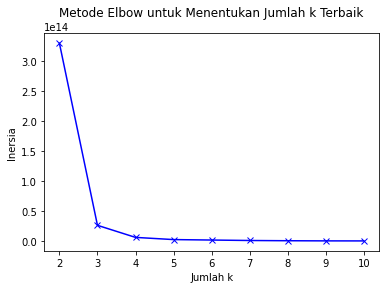

In [6]:
n_clusters = range(2, 11)
inertia = []
silhouette = []
ch_index = []

for k in n_clusters:
    model = KMeans(n_clusters=k, max_iter=500, n_init=50, random_state=42)
    member = model.fit_predict(X, y=None) 

    silhouette_avg = silhouette_score(X, member)
    ch_index_score = calinski_harabasz_score(X, member)

    inertia.append(model.inertia_)
    silhouette.append(silhouette_avg)
    ch_index.append(ch_index_score)

plt.plot(n_clusters, inertia, 'bx-')
plt.xlabel('Jumlah k')
plt.ylabel('Inersia')
plt.title('Metode Elbow untuk Menentukan Jumlah k Terbaik')
plt.show()

In [7]:
for i, s, c in zip(n_clusters, silhouette, ch_index):
    silhouette_avg = silhouette.index(max(silhouette))
    ch_index_score = ch_index.index(max(ch_index))

    print(f"Jumlah Cluster = {i}\nSilhouette Score = {s}\nCH Index Score = {c}\n")

k_silhoutte = range(2, 11)[silhouette_avg]
k_ch_index = range(2, 11)[ch_index_score]

print('\nCluster Terbaik Berdasarkan CH Index dan Silhoutte Score')
print(f'Jumlah Cluster Silhoutte = {k_silhoutte}')
print(f'Nilai Silhoutte Score = {max(silhouette)}\n')

print(f'Jumlah Cluster CH Index = {k_ch_index}')
print(f'Nilai CH Index Score = {max(ch_index)}\n')

Jumlah Cluster = 2
Silhouette Score = 0.9772046924154703
CH Index Score = 1116.2744764218985

Jumlah Cluster = 3
Silhouette Score = 0.9609950512774136
CH Index Score = 7628.084418898442

Jumlah Cluster = 4
Silhouette Score = 0.8755528204473064
CH Index Score = 21805.657240009805

Jumlah Cluster = 5
Silhouette Score = 0.785404037396296
CH Index Score = 40303.73823786111

Jumlah Cluster = 6
Silhouette Score = 0.7592505384469728
CH Index Score = 46402.5400966027

Jumlah Cluster = 7
Silhouette Score = 0.7443921240731303
CH Index Score = 69443.29759219234

Jumlah Cluster = 8
Silhouette Score = 0.7440538999167269
CH Index Score = 103035.73807699198

Jumlah Cluster = 9
Silhouette Score = 0.7280848307223349
CH Index Score = 159685.94124145186

Jumlah Cluster = 10
Silhouette Score = 0.723436721380786
CH Index Score = 182331.63459548022


Cluster Terbaik Berdasarkan CH Index dan Silhoutte Score
Jumlah Cluster Silhoutte = 2
Nilai Silhoutte Score = 0.9772046924154703

Jumlah Cluster CH Index = 10


In [8]:
distance_matrix = pairwise_distances(X, metric='euclidean')

# Perform KMedoids clustering
n_clusters = 4
kmedoids = KMedoids(n_clusters=n_clusters, random_state=42)
member = kmedoids.fit_predict(X)
silhouette_avg = silhouette_score(X, member)
ch_score = calinski_harabasz_score(X, member)

df['cluster'] = kmedoids.labels_
df['cluster'].value_counts()

2    76
0    17
1    17
3     9
Name: cluster, dtype: int64

In [9]:
hasil = hasil.append({'Algoritma': 'KMedoids 4 cluster', 'Silhoutte Score': silhouette_avg, 'CH Index Score': ch_score}, ignore_index=True)

C:\Users\Jayy\AppData\Local\Temp\ipykernel_10712\1938517170.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasil = hasil.append({'Algoritma': 'KMedoids 4 cluster', 'Silhoutte Score': silhouette_avg, 'CH Index Score': ch_score}, ignore_index=True)


In [10]:
df.groupby('cluster').describe().transpose()

cluster                                       0           1         2  \
Total                          count     17.000      17.000    76.000   
                               mean  168774.294  545608.824 16230.342   
                               std    53729.034  222900.904 21872.888   
                               min    82788.000  330029.000     0.000   
                               25%   134921.000  358145.000   184.000   
                               50%   161923.000  454770.000  4785.500   
                               75%   202076.000  710425.000 24847.500   
                               max   291161.000 1021730.000 72754.000   
Rentang Greentick Ke Juni 2023 count     17.000      17.000    76.000   
                               mean      19.706      18.294    10.066   
                               std        8.615      11.482     9.253   
                               min        4.000       3.000     0.000   
                               25%       14.000       8.000     3.000   
                               50%       20.000      16.000     7.000   
                               75%       24.000      27.000    14.000   
                               max       37.000      40.000    41.000   
Rata-rata                      count     17.000      17.000    76.000   
                               mean   12720.647   50192.588  1879.132   
                               std     5874.351   27080.700  2579.342   
                               min     6136.000   20375.000     0.000   
                               25%     9100.000   26752.000    30.250   
                               50%    11244.000   43114.000   564.500   
                               75%    13418.000   65402.000  2988.000   
                               max    26727.000  111763.000 12313.000   

cluster                                         3  
Total                          count        9.000  
                               mean  10428013.556  
                               std   17943545.767  
                               min    1578066.000  
                               25%    1837139.000  
                               50%    2251775.000  
                               75%   12109927.000  
                               max   56674832.000  
Rentang Greentick Ke Juni 2023 count        9.000  
                               mean        21.778  
                               std         12.438  
                               min          5.000  
                               25%         11.000  
                               50%         29.000  
                               75%         32.000  
                               max         36.000  
Rata-rata                      count        9.000  
                               mean    728808.889  
                               std    1070828.754  
                               min     105906.000  
                               25%     138279.000  
                               50%     204707.000  
                               75%     712349.000  
                               max    3333814.000

In [11]:
df.groupby('cluster').mean().sort_values(by='Rata-rata', ascending=False)

C:\Users\Jayy\AppData\Local\Temp\ipykernel_10712\1642471285.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('cluster').mean().sort_values(by='Rata-rata', ascending=False)


,Total,Rentang Greentick Ke Juni 2023,Rata-rata
cluster,,,
3,10428013.556,21.778,728808.889
1,545608.824,18.294,50192.588
0,168774.294,19.706,12720.647
2,16230.342,10.066,1879.132


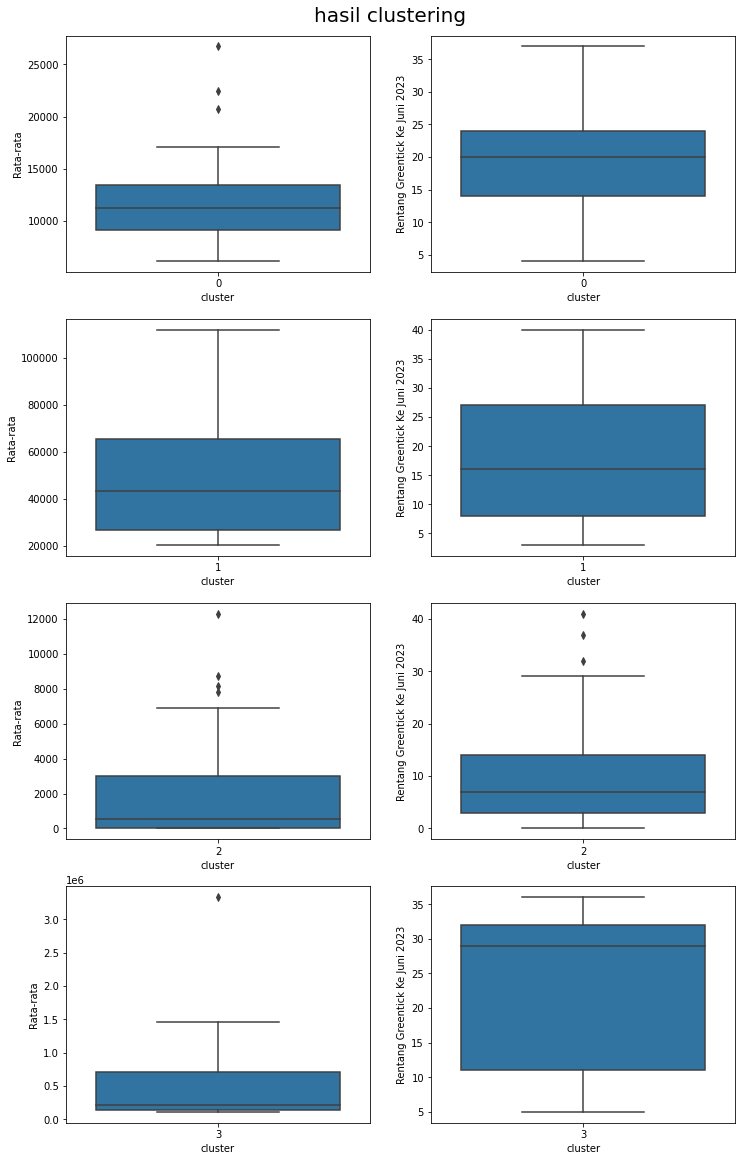

In [12]:
# make plot to see the distribution of the data
fig, ax = plt.subplots(n_clusters, 2, figsize=(12, 20))
fig.suptitle("hasil clustering", fontsize=20, y=0.9)

for i in range(n_clusters):
    sns.boxplot(data=df[df['cluster'] == i], x='cluster', y='Rata-rata', ax=ax[i, 0])
    sns.boxplot(data=df[df['cluster'] == i], x='cluster', y='Rentang Greentick Ke Juni 2023', ax=ax[i, 1])

In [13]:
df[df['cluster'] == 1]

,Masking,Total,Rentang Greentick Ke Juni 2023,Rata-rata,cluster
3,Customer 3,381243,4,95311,1
8,Customer 8,869292,27,51135,1
14,Customer 14,393048,21,23121,1
35,Customer 35,454770,23,26752,1
41,Customer 41,457813,7,65402,1
42,Customer 42,335288,3,111763,1
45,Customer 45,330029,8,41254,1
50,Customer 50,344912,8,43114,1
58,Customer 58,346373,28,20375,1
69,Customer 69,731558,16,45723,1


In [14]:
df[df['cluster'] == 2]

,Masking,Total,Rentang Greentick Ke Juni 2023,Rata-rata,cluster
1,Customer 1,20672,3,6891,2
2,Customer 2,17148,4,4287,2
4,Customer 4,10,0,10,2
6,Customer 6,61563,5,12313,2
7,Customer 7,541,6,91,2
...,...,...,...,...,...
112,Customer 112,38275,29,2252,2
114,Customer 114,949,7,136,2
115,Customer 115,0,2,0,2
117,Customer 117,0,1,0,2


# Cobain 5 Cluster Kmedoid

In [15]:
distance_matrix = pairwise_distances(X, metric='euclidean')

# Perform KMedoids clustering
n_clusters = 5
kmedoids = KMedoids(n_clusters=n_clusters, random_state=42)
member = kmedoids.fit_predict(X)
silhouette_avg = silhouette_score(X, member)
ch_score = calinski_harabasz_score(X, member)

df['cluster'] = kmedoids.labels_
df['cluster'].value_counts()

4    53
2    24
0    17
1    16
3     9
Name: cluster, dtype: int64

In [16]:
hasil = hasil.append({'Algoritma': 'KMedoids 5 cluster', 'Silhoutte Score': silhouette_avg, 'CH Index Score': ch_score}, ignore_index=True)

C:\Users\Jayy\AppData\Local\Temp\ipykernel_10712\2391550278.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasil = hasil.append({'Algoritma': 'KMedoids 5 cluster', 'Silhoutte Score': silhouette_avg, 'CH Index Score': ch_score}, ignore_index=True)


In [17]:
df.groupby('cluster').describe().transpose()

cluster                                        0          1         2  \
Total                          count      17.000     16.000    24.000   
                               mean   545608.824 174148.438 46620.333   
                               std    222900.904  50552.416 18965.112   
                               min    330029.000 104298.000 20672.000   
                               25%    358145.000 136255.250 29476.750   
                               50%    454770.000 162130.000 43035.000   
                               75%    710425.000 207108.000 61747.750   
                               max   1021730.000 291161.000 82788.000   
Rentang Greentick Ke Juni 2023 count      17.000     16.000    24.000   
                               mean       18.294     20.688    14.667   
                               std        11.482      7.855     9.680   
                               min         3.000      7.000     3.000   
                               25%         8.000     18.500     6.750   
                               50%        16.000     20.000    14.000   
                               75%        27.000     24.250    19.250   
                               max        40.000     37.000    37.000   
Rata-rata                      count      17.000     16.000    24.000   
                               mean    50192.588  12222.125  5327.417   
                               std     27080.700   5683.481  4253.350   
                               min     20375.000   6136.000  1658.000   
                               25%     26752.000   8835.500  2396.000   
                               50%     43114.000  11164.000  3832.500   
                               75%     65402.000  13190.000  6509.250   
                               max    111763.000  26727.000 20697.000   

cluster                                         3         4  
Total                          count        9.000    53.000  
                               mean  10428013.556  3724.642  
                               std   17943545.767  5521.087  
                               min    1578066.000     0.000  
                               25%    1837139.000    11.000  
                               50%    2251775.000   541.000  
                               75%   12109927.000  5774.000  
                               max   56674832.000 18909.000  
Rentang Greentick Ke Juni 2023 count        9.000    53.000  
                               mean        21.778     7.868  
                               std         12.438     8.249  
                               min          5.000     0.000  
                               25%         11.000     2.000  
                               50%         29.000     5.000  
                               75%         32.000    11.000  
                               max         36.000    41.000  
Rata-rata                      count        9.000    53.000  
                               mean    728808.889   672.698  
                               std    1070828.754  1196.775  
                               min     105906.000     0.000  
                               25%     138279.000     7.000  
                               50%     204707.000   142.000  
                               75%     712349.000   579.000  
                               max    3333814.000  5590.000

In [18]:
df.groupby('cluster').mean().sort_values(by='Rata-rata', ascending=False)

C:\Users\Jayy\AppData\Local\Temp\ipykernel_10712\1642471285.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('cluster').mean().sort_values(by='Rata-rata', ascending=False)


,Total,Rentang Greentick Ke Juni 2023,Rata-rata
cluster,,,
3,10428013.556,21.778,728808.889
0,545608.824,18.294,50192.588
1,174148.438,20.688,12222.125
2,46620.333,14.667,5327.417
4,3724.642,7.868,672.698


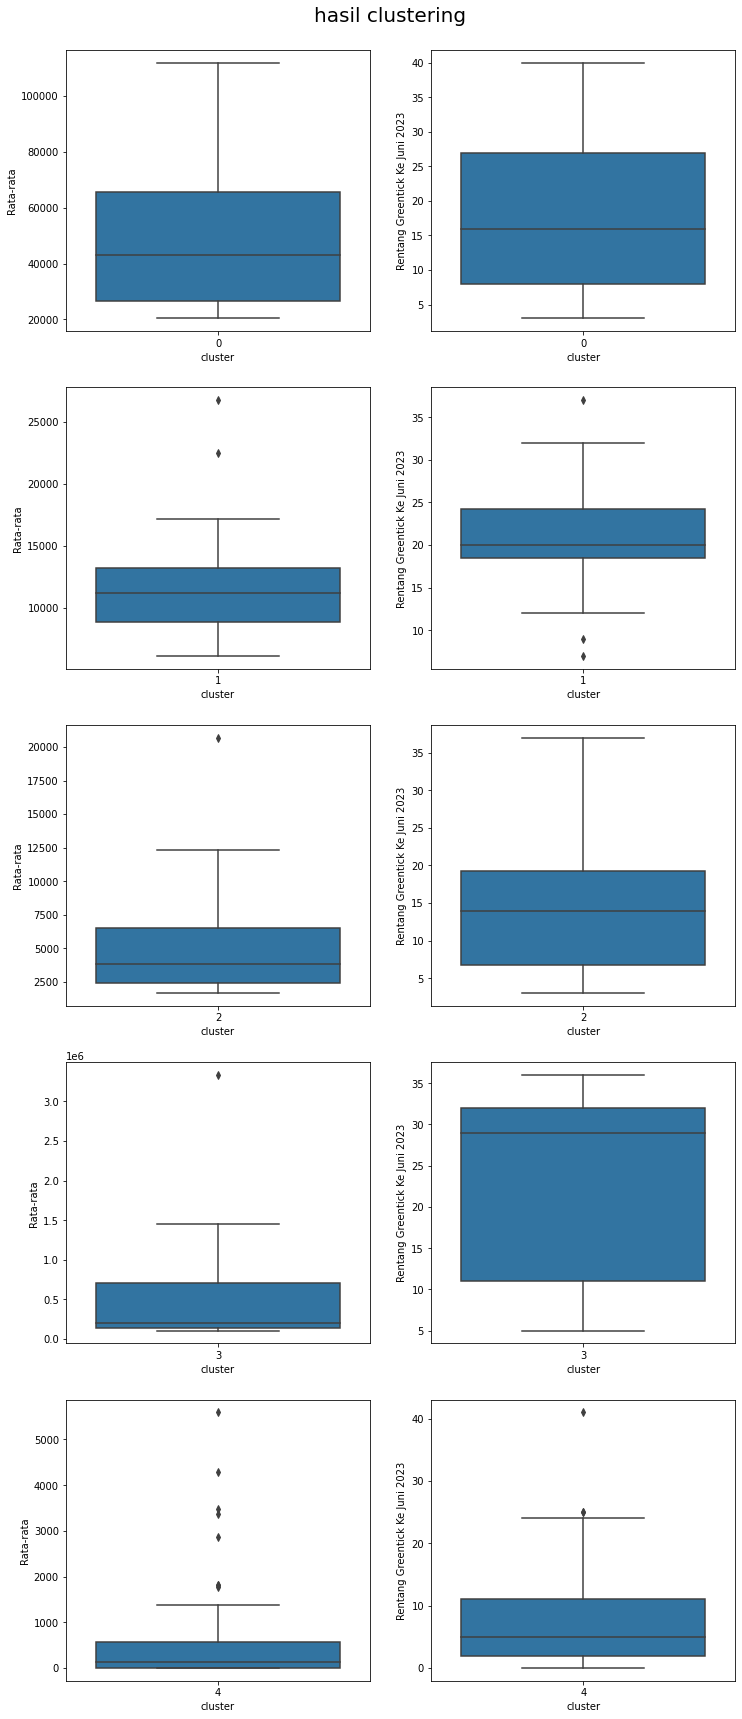

In [19]:
# make plot to see the distribution of the data
fig, ax = plt.subplots(n_clusters, 2, figsize=(12, 6*n_clusters))
fig.suptitle("hasil clustering", fontsize=20, y=0.9)

for i in range(n_clusters):
    sns.boxplot(data=df[df['cluster'] == i], x='cluster', y='Rata-rata', ax=ax[i, 0])
    sns.boxplot(data=df[df['cluster'] == i], x='cluster', y='Rentang Greentick Ke Juni 2023', ax=ax[i, 1])

In [20]:
df[df['cluster'] == 2]

,Masking,Total,Rentang Greentick Ke Juni 2023,Rata-rata,cluster
1,Customer 1,20672,3,6891,2
5,Customer 5,82788,4,20697,2
6,Customer 6,61563,5,12313,2
11,Customer 11,72754,14,5197,2
12,Customer 12,25989,7,3713,2
17,Customer 17,61245,7,8750,2
19,Customer 19,55956,12,4663,2
29,Customer 29,24467,3,8156,2
37,Customer 37,71222,12,5936,2
46,Customer 46,39103,16,2444,2


In [21]:
df[df['cluster'] == 4]

,Masking,Total,Rentang Greentick Ke Juni 2023,Rata-rata,cluster
2,Customer 2,17148,4,4287,4
4,Customer 4,10,0,10,4
7,Customer 7,541,6,91,4
10,Customer 10,6,4,2,4
18,Customer 18,248,8,31,4
20,Customer 20,189,2,95,4
21,Customer 21,169,0,169,4
22,Customer 22,310,2,155,4
23,Customer 23,4,1,4,4
24,Customer 24,2851,5,571,4


# Cobain aglomerative

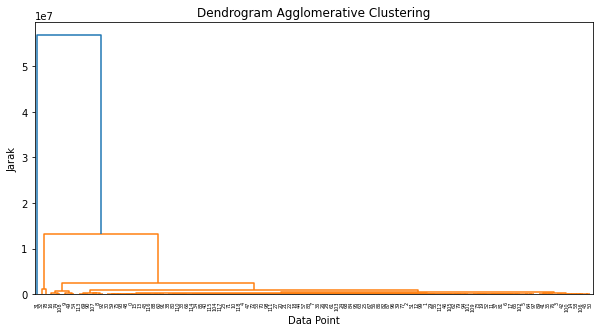

Hasil Clustering:
Cluster 1:
       Total  Rentang Greentick Ke Juni 2023  Rata-rata
32  13092618                               9    1454736
78  12109927                              34     712349

Cluster 2:
       Total  Rentang Greentick Ke Juni 2023  Rata-rata
9    1578066                               5     315614
16   2156652                              29     126862
49   1800386                              29     105906
54   1837139                              11     167013
74   2350727                              32     138279
108  2251775                              11     204707

Cluster 3:
      Total  Rentang Greentick Ke Juni 2023  Rata-rata
0    134921                              12      11244
1     20672                               3       6891
2     17148                               4       4287
3    381243                               4      95311
4        10                               0         10
..      ...                             ...        ...
11

In [22]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

n_clusters = 4
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='complete')
agg_labels = agg_clustering.fit_predict(X)

# Membuat dendrogram
from scipy.cluster.hierarchy import linkage
Z = linkage(X, method='complete')
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Dendrogram Agglomerative Clustering')
plt.xlabel('Data Point')
plt.ylabel('Jarak')
plt.show()

# Menampilkan hasil clustering
print("Hasil Clustering:")
for i in range(n_clusters):
    cluster_points = X[agg_labels == i]
    print(f"Cluster {i + 1}:")
    print(cluster_points)
    print()

In [23]:
silhouette_avg = silhouette_score(X, agg_labels)
ch_score = calinski_harabasz_score(X, agg_labels)

In [24]:
hasil = hasil.append({'Algoritma': 'Aglomerative', 'Silhoutte Score': silhouette_avg, 'CH Index Score': ch_score}, ignore_index=True)

C:\Users\Jayy\AppData\Local\Temp\ipykernel_10712\2688287668.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasil = hasil.append({'Algoritma': 'Aglomerative', 'Silhoutte Score': silhouette_avg, 'CH Index Score': ch_score}, ignore_index=True)


In [25]:
hasil

,Algoritma,Silhoutte Score,CH Index Score
0,KMedoids 4 cluster,0.596,13.223
1,KMedoids 5 cluster,0.503,9.831
2,Aglomerative,0.876,21805.657


In [26]:
df['cluster Aglomerative'] = agg_labels
df['cluster Aglomerative'].value_counts()

2    110
1      6
0      2
3      1
Name: cluster Aglomerative, dtype: int64

In [27]:
df.groupby('cluster Aglomerative').mean()

C:\Users\Jayy\AppData\Local\Temp\ipykernel_10712\3892165119.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('cluster Aglomerative').mean()


,Total,Rentang Greentick Ke Juni 2023,Rata-rata,cluster
cluster Aglomerative,,,,
0,12601272.500,21.500,1083542.500,3.000
1,1995790.833,19.500,176396.833,3.000
2,121618.355,12.827,11021.264,2.509
3,56674832.000,36.000,3333814.000,3.000
